# PyPopStar Quick Start: Making A Cluster

This is a quick start guide to making a synthetic cluster using the PopStar package. The cluster is constructed using a user-specified isochrone and initial mass function (IMF). Detailed documentation with all the available options to the user at each step is provided in the ReadtheDocs page (https://pypopstar.readthedocs.io/en/new_doc/index.html).

Before starting this tutorial, it is assumed that PopStar has been installed and the user's python path has been altered to include the PopStar top-level directory

In [1]:
# Import necessary packages. 
from popstar import synthetic, evolution, atmospheres, reddening, ifmr
from popstar.imf import imf, multiplicity
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt

/Users/michael/miniconda3/lib/python3.6/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /Users/michael/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


#### Step 1: Make a PopStar isochrone object

The cluster is made from a theoretical isochrone at a given age, extinction, and distance from Earth. These parameters MUST be specified by the user. Other inputs (e.g. stellar evolution/atmosphere models, extinction law, and photometric filters used) are optional keywords. See documentation for all keywords and their default values.

Here, we create a 5 Myr cluster isochrone at an extinction of 0.8 mags and distance of 4000 pc from Earth.

In [2]:
# Define isochrone parameters
logAge = np.log10(5*10**6.) # Age in log(years)
AKs = 0.8 # extinction in mags
dist = 4000 # distance in parsec
metallicity = 0 # Metallicity in [M/H]

# Define evolution/atmosphere models and extinction law
evo_model = evolution.MISTv1() 
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()

# Also specify filters for synthetic photometry (optional). Here we use 
# the HST WFC3-IR F127M, F139M, and F153M filters
filt_list = ['wfc3,ir,f127m', 'wfc3,ir,f139m', 'wfc3,ir,f153m']

# Make Isochrone object. Note that is calculation will take a few minutes, unless the 
# isochrone has been generated previously.
my_iso = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=0,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list)

Changing to logg=4.00 for T= 31564 logg=3.99
Changing to logg=4.00 for T= 31746 logg=3.98
Changing to logg=4.00 for T= 31976 logg=3.97
Changing to logg=4.00 for T= 32247 logg=3.95
Changing to logg=4.00 for T= 32476 logg=3.94
Changing to logg=4.00 for T= 32664 logg=3.92
Changing to logg=4.00 for T= 32840 logg=3.90
Changing to logg=4.00 for T= 33026 logg=3.88
Changing to logg=4.00 for T= 33214 logg=3.86
Changing to logg=4.00 for T= 33385 logg=3.84
Changing to logg=4.00 for T= 33524 logg=3.82
Changing to logg=4.00 for T= 33550 logg=3.82
Changing to logg=4.00 for T= 33573 logg=3.81
Changing to logg=4.00 for T= 33591 logg=3.81
Changing to logg=4.00 for T= 33607 logg=3.80
Changing to logg=4.00 for T= 33623 logg=3.79
Changing to logg=4.00 for T= 33642 logg=3.79
Changing to logg=4.00 for T= 33667 logg=3.78
Changing to logg=4.00 for T= 33698 logg=3.77
Changing to logg=4.00 for T= 33716 logg=3.76
Changing to logg=4.00 for T= 33685 logg=3.74
Changing to logg=4.00 for T= 33620 logg=3.71
Changing t

Changing to logg=2.00 for T= 11259 logg=1.42
Changing to logg=2.00 for T= 11165 logg=1.40
Changing to logg=2.00 for T= 11072 logg=1.39
Changing to logg=2.00 for T= 10981 logg=1.37
Changing to logg=2.00 for T= 10889 logg=1.36
Changing to logg=2.00 for T= 10804 logg=1.34
Changing to logg=2.00 for T= 10720 logg=1.33
Changing to logg=2.00 for T= 10636 logg=1.31
Changing to logg=2.00 for T= 10554 logg=1.30
Changing to logg=2.00 for T= 10471 logg=1.28
Changing to logg=2.00 for T= 10390 logg=1.27
Changing to logg=2.00 for T= 10309 logg=1.25
Changing to logg=2.00 for T= 10229 logg=1.24
Changing to logg=2.00 for T= 10149 logg=1.23
Changing to logg=2.00 for T= 10070 logg=1.21
Changing to logg=2.00 for T=  9992 logg=1.20
Changing to logg=2.00 for T=  9914 logg=1.18
Changing to logg=2.00 for T=  9837 logg=1.17
Changing to logg=2.00 for T=  9760 logg=1.16
Changing to logg=2.00 for T=  9684 logg=1.14
Changing to logg=2.00 for T=  9609 logg=1.13
Changing to logg=2.00 for T=  9534 logg=1.12
Changing t

Changing to logg=2.50 for T= 14379 logg=1.49
Changing to logg=2.50 for T= 14372 logg=1.49
Changing to logg=2.50 for T= 14367 logg=1.49
Changing to logg=2.50 for T= 14364 logg=1.49
Changing to logg=2.50 for T= 14361 logg=1.49
Changing to logg=2.50 for T= 14353 logg=1.49
Changing to logg=2.50 for T= 14341 logg=1.49
Changing to logg=2.50 for T= 14329 logg=1.49
Changing to logg=2.50 for T= 14323 logg=1.49
Changing to logg=2.50 for T= 14321 logg=1.49
Changing to logg=2.50 for T= 14314 logg=1.49
Changing to logg=2.50 for T= 14306 logg=1.49
Changing to logg=2.50 for T= 14294 logg=1.49
Changing to logg=2.50 for T= 14280 logg=1.49
Changing to logg=2.50 for T= 14269 logg=1.48
Changing to logg=2.50 for T= 14263 logg=1.48
Changing to logg=2.50 for T= 14252 logg=1.48
Changing to logg=2.50 for T= 14248 logg=1.49
Changing to logg=2.50 for T= 14230 logg=1.48
Changing to logg=2.50 for T= 14222 logg=1.48
Changing to logg=2.50 for T= 14207 logg=1.48
Changing to logg=2.50 for T= 14200 logg=1.48
Changing t

Once calculated, the isochrone will be written as a fits file to a location set by the "iso_dir" keyword (not shown here; default location is current working directory). In the future, the IsochronePhot function will read this file directly rather than recalculating the isochrone again. 

The file name will be the following: "iso_logAge_AKs_distance_metallicity.fits, using the specified values

In [3]:
# The individual points in the isochrone can be accessed using the points subfunction 
# on the isochrone object. This produces an astropy table that contains the 
# list of stellar masses in the isochrone and their associated properties
print(my_iso.points)

          L                   Teff        ...    m_hst_f153m    
          W                    K          ...                   
---------------------- ------------------ ... ------------------
 8.660109049222469e+24  2997.482453641835 ... 21.152020025881267
 9.046193280874383e+24 3008.7858260184175 ... 21.105040042925086
 9.449142476745298e+24 3020.1687795233192 ... 21.058401517999204
 9.869958611246552e+24  3031.631609685951 ...  21.01196819378346
 1.076707529684324e+25 3054.6500837349886 ... 20.919820049211403
1.0829426036763875e+25 3065.3879429582494 ... 20.915498335031387
1.1480726894593663e+25  3078.908328291189 ...  20.85389456402526
 1.221834686575575e+25  3093.002145149403 ... 20.788337644566347
1.3043887291289771e+25 3107.5858797888227 ...  20.71737596885321
1.3956010100862058e+25 3122.5861578385725 ... 20.642179071676846
                   ...                ... ...                ...
 3.146902975957394e+32 13997.739388490047 ...  5.930258009074476
3.1460717791216517e+32 13

In [4]:
# The isochrone table has meta keywords describing its properties
print(my_iso.points.meta)

OrderedDict([('REDLAW', 'H18b'), ('ATMFUNC', 'get_merged_atmosphere'), ('EVOMODEL', 'MISTv1'), ('LOGAGE', 6.698970004336019), ('AKS', 0.8), ('DISTANCE', 4000), ('METAL_IN', 0), ('METAL_ACT', 0.02380291467262473), ('WAVEMIN', 3000), ('WAVEMAX', 52000)])


In [5]:
print('The columns in the isochrone table are: {0}'.format(my_iso.points.keys()))

The columns in the isochrone table are: ['L', 'Teff', 'R', 'mass', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m']


In [6]:
# Identify a 1 M_sun star, print F127M, F139M, and F153M mags
idx = np.where( abs(my_iso.points['mass'] - 1.0) == min(abs(my_iso.points['mass'] - 1.0)) )[0]
f127m = np.round(my_iso.points[idx[0]]['m_hst_f127m'], decimals=3)
f139m = np.round(my_iso.points[idx[0]]['m_hst_f139m'], decimals=3)
f153m = np.round(my_iso.points[idx[0]]['m_hst_f153m'], decimals=3)
print('1 M_sun: F127M = {0} mag, F139M = {1} mag, F153M = {2} mag'.format(f127m, f139m, f153m))

1 M_sun: F127M = 19.047 mag, F139M = 18.446 mag, F153M = 17.773 mag


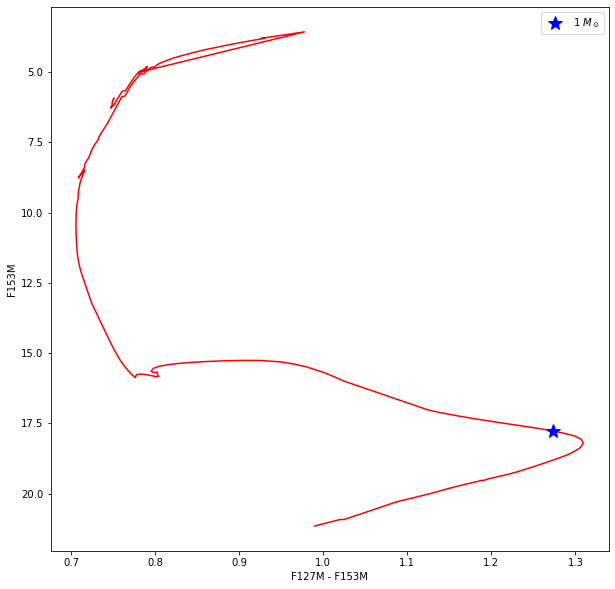

In [7]:
# Make a color-magnitude diagram
py.figure(1, figsize=(10,10))
py.clf()
py.plot(my_iso.points['m_hst_f127m'] - my_iso.points['m_hst_f153m'], 
       my_iso.points['m_hst_f153m'], 'r-', label='_nolegend_')
py.plot(my_iso.points['m_hst_f127m'][idx] - my_iso.points['m_hst_f153m'][idx], 
       my_iso.points['m_hst_f153m'][idx], 'b*', ms=15, label='1 $M_\odot$')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()
py.savefig('cmd.png')

### Step 2: Make an Initial Mass Function

PopStar offers a range of initial mass functions (IMFs) a user can use from to make the cluster. In addition to the parameters defining the IMF, the user can pass in a PopStar multiplicity object, which defines the multiplicity properties of the population. The default multiplicity is None (e.g. all stars are single).

Here we define a Kroupa IMF using the Multiplicity properties defined in Lu+13. 

In [8]:
# Make multiplicity object
imf_multi = multiplicity.MultiplicityUnresolved()

# Make IMF object; we'll use a broken power law with the parameters from Kroupa+01
massLimits = np.array([0.08, 0.5, 1, 120]) # Define boundaries of each mass segement
powers = np.array([-1.3, -2.3, -2.3]) # Power law slope associated with each mass segment
my_imf = imf.IMF_broken_powerlaw(massLimits, powers, imf_multi)

### Step 3: Make the Cluster  
#### Option 1: No compact objects
To create the cluster, the user passes in an isochrone object, and imf object, and specifies the total cluster mass. Here we will make a 10^5 M_sun cluster using the isochrone and imf we have defined.

The individual star systems in the cluster and their properties are stored in an astropy table accessed by the star_systems subfunction on the cluster object. Note that the photometry of these star systems includes the contributions from all companions, which are generated probabilistically using the multiplicity defined in the IMF object.

In [9]:
# Define total cluster mass
mass = 10**5.

# Make cluster object
cluster = synthetic.ResolvedCluster(my_iso, my_imf, mass)

# Look at star systems table
print(cluster.star_systems)

/Users/michael/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/michael/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)


Found 17342 stars out of mass range
Found 2597 companions out of stellar mass range
        mass        isMultiple ...    m_hst_f153m     N_companions
------------------- ---------- ... ------------------ ------------
0.15808255853082173      False ... 20.573778461563585            0
0.36146736216248176      False ... 19.311514607441147            0
0.17078965886895064      False ... 20.462130924582862            0
 0.8243284517804788       True ...  17.87316594391203            1
0.15266651855464625      False ... 20.619744645111453            0
 3.0628865047261065       True ... 15.502074786229567            1
0.21196679327695434      False ... 20.137149058846223            0
 0.1464030518772801      False ...  20.68450706590224            0
      0.29592748652      False ...  19.62358993750828            0
0.13744266092630258      False ... 20.790614520161842            0
                ...        ... ...                ...          ...
0.17946402963296812       True ...  19.832183

In [10]:
print('The cluster table contains these columns: {0}'.format(cluster.star_systems.keys()))

The cluster table contains these columns: ['mass', 'isMultiple', 'systemMass', 'Teff', 'L', 'logg', 'isWR', 'mass_current', 'phase', 'm_hst_f127m', 'm_hst_f139m', 'm_hst_f153m', 'N_companions']


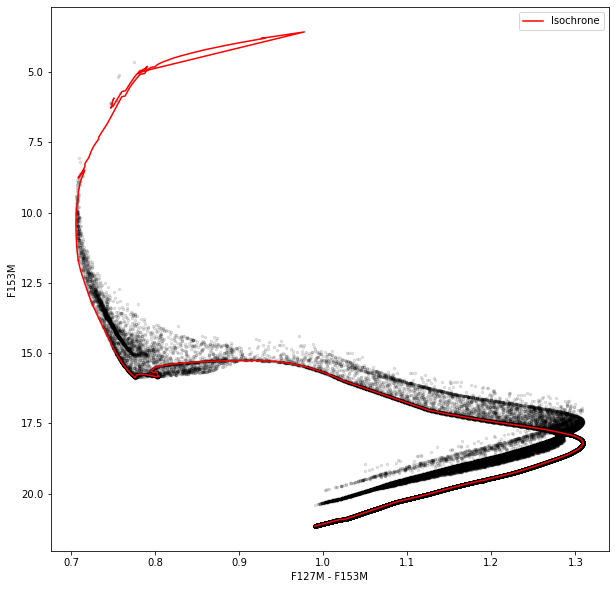

In [11]:
# Look at the cluster CMD, compared to input isochrone. Note the impact of
# multiple systems on the photometry
clust = cluster.star_systems
iso = my_iso.points

py.figure(2, figsize=(10,10))
py.clf()
py.plot(clust['m_hst_f127m'] - clust['m_hst_f153m'], clust['m_hst_f153m'],
       'k.', ms=5, alpha=0.1, label='__nolegend__')
py.plot(iso['m_hst_f127m'] - iso['m_hst_f153m'], iso['m_hst_f153m'],
       'r-', label='Isochrone')
py.xlabel('F127M - F153M')
py.ylabel('F153M')
py.gca().invert_yaxis()
py.legend()
py.savefig('simulated_cluster.png')

#### Option 2: Compact objects (white dwarfs, neutron stars, and black holes)
This is quite similar to the above, but includes compact objects. The additional piece of information required is to choose an initial-final mass relation (IFMR.) Currently there's only one choice in PopStar, so that makes your decision easy...

The output is the same as if we were making a cluster without using an IFMR. However, you can tell that compact objects are made by looking at the 'phase' keyword. Black holes have 'phase' = 103, neutron stars have 'phase' = 102, and white dwarfs have 'phase' = 101. For these compact objects, the luminosity and temperature will return values of zero, and photometry will return nan, since we are assuming they are totally dark.

Here, we make 4 different clusters, each of mass $10^6 M_\odot$, by taking different combinations of age (either 100 Myr or 10 Gyr) and IMF (top-heavy or Kroupa). We then look at the different distributions of BH and WD masses. (Since NSs are all assigned a single mass in the IFMR, the mass distribution there is not very interesting. However, the relative number of NSs for each cluster will be different.)

In [12]:
# Create isochrone object  
filt_list = ['wfc3,ir,f153m'] # We won't be doing much with synthetic photometry here, so only 1 filter
my_ifmr = ifmr.IFMR()
my_iso_young = synthetic.IsochronePhot(8, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                      filters=filt_list)

my_iso_old = synthetic.IsochronePhot(10, 0, 10,
                                 evo_model = evolution.MISTv1(),
                                    filters=filt_list)
# Create IMF object                                                                                                                                                        
massLimits = np.array([0.1, 0.5, 120])
powers_kroupa = np.array([-1.3, -2.3])
powers_theavy = np.array([-1.3, -1.3]) # top heavy
trunc_kroupa = imf.IMF_broken_powerlaw(massLimits, powers_kroupa)
trunc_theavy = imf.IMF_broken_powerlaw(massLimits, powers_theavy)

# Make cluster                                                                                                                                                             
cluster_mass = 10**6
cluster_young_theavy = synthetic.ResolvedCluster(my_iso_young, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_old_theavy = synthetic.ResolvedCluster(my_iso_old, trunc_theavy, cluster_mass, ifmr=my_ifmr)
cluster_young_kroupa = synthetic.ResolvedCluster(my_iso_young, trunc_kroupa, cluster_mass, ifmr=my_ifmr)
cluster_old_kroupa = synthetic.ResolvedCluster(my_iso_old, trunc_kroupa, cluster_mass, ifmr=my_ifmr)

# Get the outputs
young_theavy = cluster_young_theavy.star_systems
old_theavy = cluster_old_theavy.star_systems
young_kroupa = cluster_young_kroupa.star_systems
old_kroupa = cluster_old_kroupa.star_systems

Isochrone generation took 89.881670 s.
Making photometry for isochrone: log(t) = 8.00  AKs = 0.00  dist = 10
     Starting at:  2020-01-23 18:03:40.029330   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.01 seconds
Starting synthetic photometry
M =   0.112 Msun  T =  3010 K  m_hst_f153m = 8.71
M =   1.612 Msun  T =  7715 K  m_hst_f153m = 2.10
M =   4.773 Msun  T = 13582 K  m_hst_f153m = -1.33
M =   5.013 Msun  T = 10084 K  m_hst_f153m = -2.79
M =   5.020 Msun  T =  4310 K  m_hst_f153m = -4.95
M =   5.271 Msun  T =  4854 K  m_hst_f153m = -5.22
M =   5.321 Msun  T =  3454 K  m_hst_f153m = -7.60
M =   5.324 Msun  T = 26655 K  m_hst_f153m = -3.20
M =   5.324 Msun  T = 192342 K  m_hst_f153m = 3.13
      Time taken: 19.96 seconds


Isochrone generation took 82.924912 s.
Making photometry for isochrone: log(t) = 10.00  AKs = 0.00  dist = 10
     Starting at:  2020-01-23 18:05:22.948957   Usually takes ~5 minutes
Starting filter: wfc3,ir,f153m   Elapsed time: 0.01 seconds
Starting synthetic photometry
M =   0.109 Msun  T =  2942 K  m_hst_f153m = 9.60
M =   0.826 Msun  T =  5218 K  m_hst_f153m = 3.90
M =   1.025 Msun  T =  4564 K  m_hst_f153m = -0.61
M =   1.029 Msun  T =  4478 K  m_hst_f153m = -1.73
M =   1.032 Msun  T =  4241 K  m_hst_f153m = -2.58
M =   1.033 Msun  T =  3344 K  m_hst_f153m = -5.29
M =   1.033 Msun  T =  3288 K  m_hst_f153m = -5.40
M =   1.033 Msun  T =  3195 K  m_hst_f153m = -5.55
M =   1.033 Msun  T = 10790 K  m_hst_f153m = -3.78
M =   1.033 Msun  T = 61970 K  m_hst_f153m = 1.60
M =   1.033 Msun  T = 83275 K  m_hst_f153m = 7.39
      Time taken: 22.23 seconds


/Users/michael/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/Users/michael/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/Users/michael/miniconda3/lib/python3.6/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr(super(), op)(other)


Found 5582 stars out of mass range
Found 4210 stars out of mass range
Found 99742 stars out of mass range
Found 73786 stars out of mass range


In [13]:
young_theavy_bh_idx = np.where(young_theavy['phase'] == 103)[0]
old_theavy_bh_idx = np.where(old_theavy['phase'] == 103)[0]
young_kroupa_bh_idx = np.where(young_kroupa['phase'] == 103)[0]
old_kroupa_bh_idx = np.where(old_kroupa['phase'] == 103)[0]

bh_bins = np.linspace(5, 16, 16)
wd_bins = np.linspace(0.4, 1.4, 16)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.hist(young_theavy[young_theavy_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '100 Myr, TH IMF', color = 'red', linestyle = ':', lw = 2)
plt.hist(old_theavy[old_theavy_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '10 Gyr, TH IMF', color = 'gray', linestyle = ':', lw = 2)
plt.hist(young_kroupa[young_kroupa_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '100 Myr, Kr IMF', color = 'red', lw = 2)
plt.hist(old_kroupa[old_kroupa_bh_idx]['mass_current'], histtype = 'step',
        bins = bh_bins, label = '10 Gyr, Kr IMF', color = 'gray', lw = 2)
plt.title('BH Mass Function')
plt.xlabel('Mass ($M_\odot$)')
plt.ylabel('Number')
plt.legend()

young_theavy_wd_idx = np.where(young_theavy['phase'] == 101)[0]
old_theavy_wd_idx = np.where(old_theavy['phase'] == 101)[0]
young_kroupa_wd_idx = np.where(young_kroupa['phase'] == 101)[0]
old_kroupa_wd_idx = np.where(old_kroupa['phase'] == 101)[0]

plt.subplot(1, 2, 2)
plt.hist(young_theavy[young_theavy_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '100 Myr, TH IMF', color = 'red', linestyle = ':', lw = 2)
plt.hist(old_theavy[old_theavy_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '10 Gyr, TH IMF', color = 'gray', linestyle = ':', lw = 2)
plt.hist(young_kroupa[young_kroupa_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '100 Myr, Kr IMF', color = 'red', lw = 2)
plt.hist(old_kroupa[old_kroupa_wd_idx]['mass_current'], histtype = 'step',
        bins = wd_bins, label = '10 Gyr, Kr IMF', color = 'gray', lw = 2)
plt.yscale('log')
plt.title('WD Mass Function')
plt.xlabel('Mass ($M_\odot$)')
plt.legend()
py.savefig('compact_remnants.png')

Plotted above are the distributions of BH and WD masses for clusters of different ages (100 Myr or 10 Gyr), with either a top-heavy or Kroupa IMF. For BHs, since those are formed relatively early on, the age of the cluster does not significantly change the mass distribution as most BHs have already formed by 100 Myr. However, the top heavy IMF allows the creation of many more massive compact objects. For WDs, both the age and IMF make significant differences in the distribution (note y-axis is logscaled).